In [1]:
#4023
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

# [WriteCode] to import other necessary packages
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [2]:
# Useful function

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i+look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
#@title Input Parameters { run: "auto", form-width: "50%" }
ep = 20#@param {type:"number"} # epochs
ba = 10#@param {type:"number"} # batch_size

In [3]:
# fix random seed for reproducibility
np.random.seed(7)

# Load the dataset - Note: run the next line when you first connect to a Colab session in order to transfer the data file to Colab. After that, the line can be commented out.
!wget https://www.ece.nus.edu.sg/stfpage/eletck/datafile.csv

dataframe = pd.read_csv('datafile.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# split into train and test sets
train_size = int(len(dataset)*0.67)
test_size = len(dataset)-train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into input pattern X and target value Y
look_back=3 # DO NOT change this value
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

--2022-05-04 02:10:35--  https://www.ece.nus.edu.sg/stfpage/eletck/datafile.csv
Resolving www.ece.nus.edu.sg (www.ece.nus.edu.sg)... 137.132.5.15
Connecting to www.ece.nus.edu.sg (www.ece.nus.edu.sg)|137.132.5.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1883 (1.8K) [application/octet-stream]
Saving to: ‘datafile.csv’

datafile.csv        100%[===================>]   1.84K  --.-KB/s    in 0s      

2022-05-04 02:10:37 (283 MB/s) - ‘datafile.csv’ saved [1883/1883]



In [51]:
# [WriteCode] to create the specified model

# Print out the model summary after creating it
# model.summary()
model = Sequential(
    [
        Conv1D(8, 1, activation="relu", input_shape=(3,1)),
        Conv1D(12, 1, activation="relu"),
        Conv1D(8, 1, activation="relu"),
        Flatten(),
        Dense(1, activation="relu"),
    ]
)
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_69 (Conv1D)          (None, 3, 8)              16        
                                                                 
 conv1d_70 (Conv1D)          (None, 3, 12)             108       
                                                                 
 conv1d_71 (Conv1D)          (None, 3, 8)              104       
                                                                 
 flatten_2 (Flatten)         (None, 24)                0         
                                                                 
 dense_22 (Dense)            (None, 1)                 25        
                                                                 
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [52]:
# [WriteCode] to train the model and collect loss and validation data
# Note: use verbose=1 and include the output in your submission
model.compile(
    optimizer='adam',  # newest ADAM
    loss='mse',  # multi-class labeling
    metrics=['mse'],
)
history = model.fit(trainX, trainY, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
3/3 [==============================] - 1s 4ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 2/10
3/3 [==============================] - 0s 4ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 3/10
3/3 [==============================] - 0s 5ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 4/10
3/3 [==============================] - 0s 4ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 6/10
3/3 [==============================] - 0s 4ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 7/10
3/3 [==============================] - 0s 4ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 51956.0234 - mse: 51956.0234
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 51956.0234 - mse: 51956.0234


In [53]:
# [WriteCode] to determine the performance of your model using training and test data
_, mae = model.evaluate(trainX, trainY)
print('MSE : %.3f' % (mae))
_, mae = model.evaluate(testX, testY)
print('MSE : %.3f' % (mae))

3/3 [==============================] - 0s 4ms/step - loss: 51956.0234 - mse: 51956.0234
MSE : 51956.023
2/2 [==============================] - 0s 7ms/step - loss: 181763.8438 - mse: 181763.8438
MSE : 181763.844


In [54]:
# [WriteCode] to generate predictions for training and test data using the trained model
# store predictions in tr_pred and ts_pred, respectively
tr_pred=model.predict(trainX) # Note: tr_pred filled with zeros only for visualisation below; Replace with predictions from your model
ts_pred=model.predict(testX) # Note: ts_pred filled with zeros only for visualisation below; Replace with predictions from your model

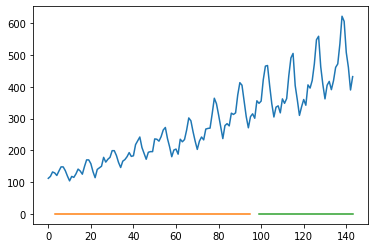

In [55]:
# Shift train predictions for plotting
tr_predPlot = np.empty_like(dataset)
tr_predPlot[:, :] = np.nan
tr_predPlot[look_back:len(tr_pred)+look_back,:] = tr_pred
# Shift test predictions for plotting
ts_predPlot = np.empty_like(dataset)
ts_predPlot[:, :] = np.nan
ts_predPlot[len(tr_pred)+(look_back*2):len(dataset),:] = ts_pred
# Plot baseline and predictions
plt.plot(dataset)
plt.plot(tr_predPlot)
plt.plot(ts_predPlot)
plt.show()

Working
(3+1)*8=32
(3+1)